In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer

In [8]:
#Importar o dataset
so = pd.read_excel('EO-SO.xlsx', sheet_name='SO')

so = so.loc[:, ~so.columns.str.contains('^Unnamed')]
so = so[['ECON-ECON', 'ECON-SOC', 'ECON-ECOL', 'SOC-ECON', 'SOC-SOC', 'SOC-ECOL', 'ECOL-ECON', 'ECOL-SOC', 'ECOL-ECOL']]
so.fillna(value=0, inplace=True)
so.head()

,ECON-ECON,ECON-SOC,ECON-ECOL,SOC-ECON,SOC-SOC,SOC-ECOL,ECOL-ECON,ECOL-SOC,ECOL-ECOL
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Importar o dataset
eo = pd.read_excel('EO-SO.xlsx', sheet_name='EO')

eo = eo[['INNOVATIVE', 'PROACTIVE', 'RISK TAKING', 'FUTURITY']]
eo.fillna(value=0, inplace=True)

eo.head()

,INNOVATIVE,PROACTIVE,RISK TAKING,FUTURITY
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [9]:
#Factor Analysis
fa = FactorAnalyzer(n_factors=3, rotation='varimax')

In [10]:
fa.fit(eo)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [13]:
#Get Loadings
loadings = fa.loadings_
loadings

array([[ 8.58273518e-01,  4.55092353e-01, -4.18410906e-02],
       [-8.58273513e-01,  4.55092360e-01, -4.18410930e-02],
       [-3.17922403e-09, -9.26885646e-01, -3.24435392e-01],
       [-2.77232485e-10,  1.17904307e-01,  5.13356574e-01]])

In [14]:
#Get Eigenvector and eigenvalues
ev, v = fa.get_eigenvalues()

In [16]:
# Scree plot
xval = range(1, eo.shape[1]+1) #df.shape[1] é o número de colunas
xval

range(1, 5)

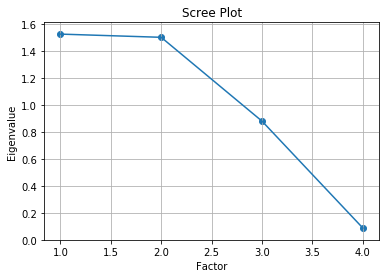

In [19]:
plt.scatter(xval, ev)
plt.plot(xval, ev)

plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()

In [20]:
pd.DataFrame.from_records(loadings)

,0,1,2
0,8.582735e-01,0.455092,-0.041841
1,-8.582735e-01,0.455092,-0.041841
2,-3.179224e-09,-0.926886,-0.324435
3,-2.772325e-10,0.117904,0.513357
